In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, plot_roc_curve

plt.style.use('bmh')

In [2]:
data = pd.read_excel('default of credit card clients.xls', index_col=0, header=1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
X = data.copy(deep=True)
y = X.pop('default payment next month')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [4]:
y_train.value_counts(normalize=True)

0    0.77881
1    0.22119
Name: default payment next month, dtype: float64

In [5]:
y_test.value_counts(normalize=True)

0    0.778778
1    0.221222
Name: default payment next month, dtype: float64

In [6]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [7]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc*100:.2f}%")
print(f"Test accuracy: {test_acc*100:.2f}%")

Train accuracy: 99.96%
Test accuracy: 72.22%


Train accuracy: 99.96%


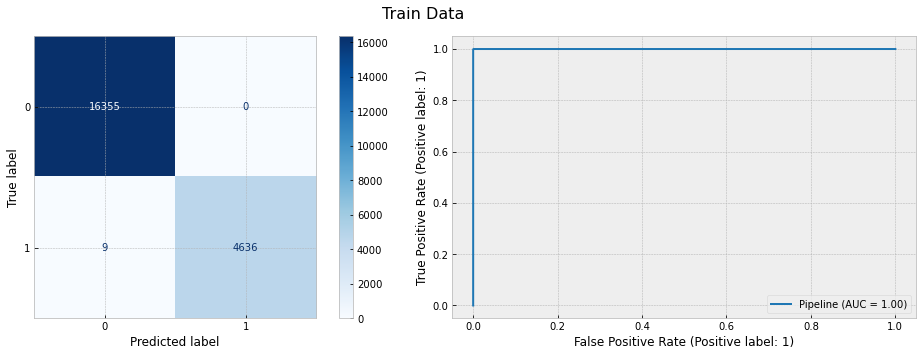

Test accuracy: 72.22%


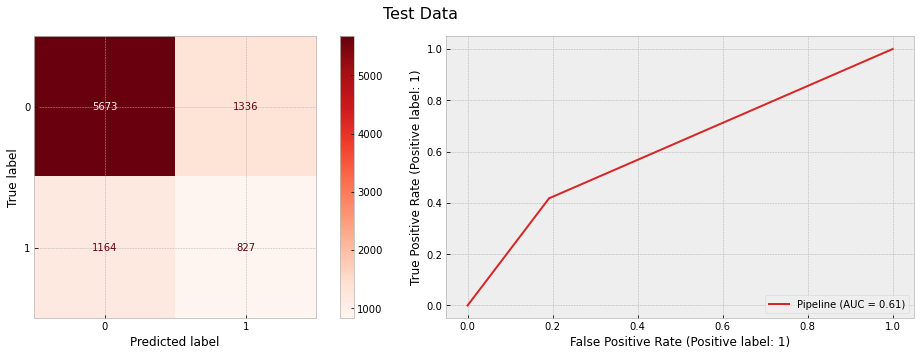

In [8]:
print(f"Train accuracy: {train_acc*100:.2f}%")

fig, ax = plt.subplots(1, 2, figsize=(14,5))

plot_confusion_matrix(pipe, X_train, y_train, ax=ax[0], cmap='Blues')
plot_roc_curve(pipe, X_train, y_train, ax=ax[1], color='tab:blue')

fig.suptitle('Train Data', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Test accuracy: {test_acc*100:.2f}%")

fig, ax = plt.subplots(1, 2, figsize=(14,5))

plot_confusion_matrix(pipe, X_test, y_test, ax=ax[0], cmap='Reds')
plot_roc_curve(pipe, X_test, y_test, ax=ax[1], color='tab:red')

fig.suptitle('Test Data', fontsize=16)
plt.tight_layout()
plt.show()

## Cross-validation

In [9]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True)
cross_val_score(pipe, X_train, y_train, cv=k_fold)

array([0.7302381 , 0.71785714, 0.72642857, 0.7247619 , 0.73380952])

In [10]:
cross_validate(pipe, X_train, y_train, cv=k_fold,
               scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

{'fit_time': array([0.49777579, 0.44330382, 0.5206151 , 0.45743251, 0.42623401]),
 'score_time': array([0.0141573 , 0.01544714, 0.01375675, 0.01482224, 0.01359797]),
 'test_accuracy': array([0.72357143, 0.71761905, 0.72142857, 0.72952381, 0.72309524]),
 'test_precision': array([0.38671875, 0.37289812, 0.3753878 , 0.39701493, 0.38346614]),
 'test_recall': array([0.4262648 , 0.4058127 , 0.39074273, 0.42949408, 0.41442411]),
 'test_roc_auc': array([0.61704959, 0.60572161, 0.60304486, 0.62202761, 0.61259267])}

In [11]:
param_grid = {'decisiontreeclassifier__criterion': ['entropy', 'gini'],
              'decisiontreeclassifier__max_depth': range(2, 11),
              'decisiontreeclassifier__min_samples_leaf': range(2, 11),
             }

rscv = RandomizedSearchCV(pipe, param_grid, cv=10, n_iter=100, n_jobs=-1, verbose=1)
search = rscv.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [12]:
print(f"Best estimator: {search.best_estimator_}")
print(f"Best params: {search.best_estimator_}")
print(f"Best train scores: {search.best_score_}")
print(f"Test score: {search.score(X_test, y_test)}")

Best estimator: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=6))])
Best params: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=6))])
Best train scores: 0.8214285714285715
Test score: 0.8164444444444444


Train accuracy: 82.58%


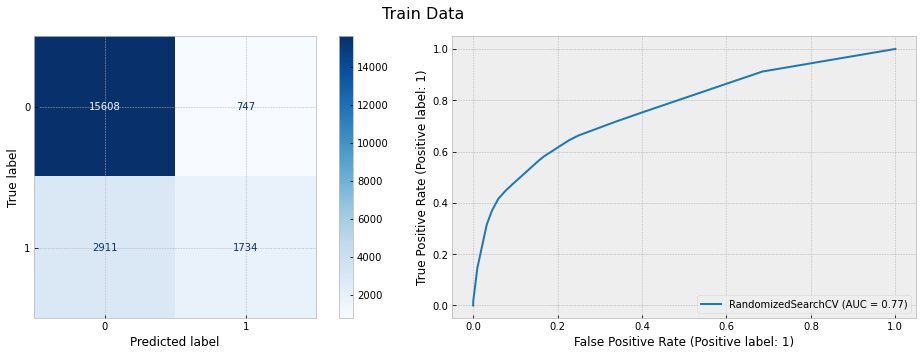

Test accuracy: 81.64%


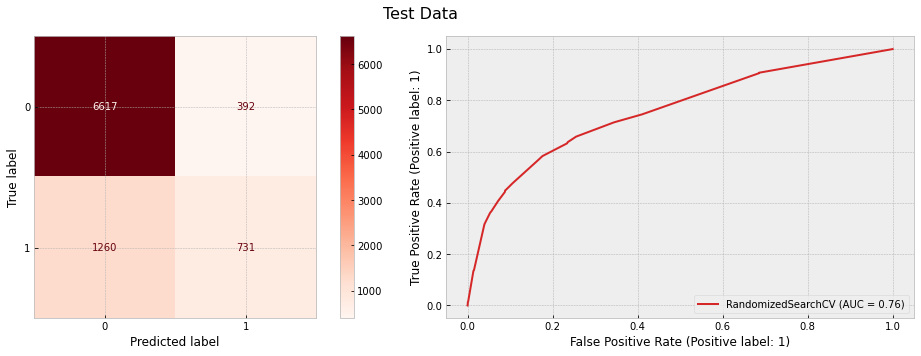

In [13]:
print(f"Train accuracy: {search.score(X_train, y_train)*100:.2f}%")

fig, ax = plt.subplots(1, 2, figsize=(14,5))

plot_confusion_matrix(search, X_train, y_train, ax=ax[0], cmap='Blues')
plot_roc_curve(search, X_train, y_train, ax=ax[1], color='tab:blue')

fig.suptitle('Train Data', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Test accuracy: {search.score(X_test, y_test)*100:.2f}%")

fig, ax = plt.subplots(1, 2, figsize=(14,5))

plot_confusion_matrix(search, X_test, y_test, ax=ax[0], cmap='Reds')
plot_roc_curve(search, X_test, y_test, ax=ax[1], color='tab:red')

fig.suptitle('Test Data', fontsize=16)
plt.tight_layout()
plt.show()